Download this dataset from kaggle :
https://www.kaggle.com/datasets/taweilo/wine-quality-dataset-balanced-classification/data

#Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv("/content/drive/MyDrive/NN/Lab 3/wine_data.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [5]:
def quality_category(quality):
    if quality <= 4:
        return "low"
    elif quality <= 6:
        return "medium"
    else:
        return "high"

df['quality_label'] = df['quality'].apply(quality_category)
df.drop('quality', axis=1, inplace=True)

# Encode labels
label_encoder = LabelEncoder()
df['quality_label'] = label_encoder.fit_transform(df['quality_label'])

In [6]:
X = df.drop('quality_label', axis=1)
y = df['quality_label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
#Build ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: low, medium, high
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6943 - loss: 0.6751 - val_accuracy: 0.6265 - val_loss: 0.7902
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6989 - loss: 0.6707 - val_accuracy: 0.6235 - val_loss: 0.7938
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7118 - loss: 0.6604 - val_accuracy: 0.6223 - val_loss: 0.7879
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6980 - loss: 0.6773 - val_accuracy: 0.6214 - val_loss: 0.7916
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7058 - loss: 0.6557 - val_accuracy: 0.6190 - val_loss: 0.7941
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6947 - loss: 0.6688 - val_accuracy: 0.6289 - val_loss: 0.7963
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7039 - loss: 0.6581 - val_accuracy: 0.6232 - val_loss: 0.7929
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7024 - loss: 0.6619 - val_accuracy: 0.

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - loss: 0.8309
Test Accuracy: 0.6393


In [18]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1074  519  213]
 [ 497  645   51]
 [ 144   91  966]]
              precision    recall  f1-score   support

        high       0.63      0.59      0.61      1806
         low       0.51      0.54      0.53      1193
      medium       0.79      0.80      0.79      1201

    accuracy                           0.64      4200
   macro avg       0.64      0.65      0.64      4200
weighted avg       0.64      0.64      0.64      4200



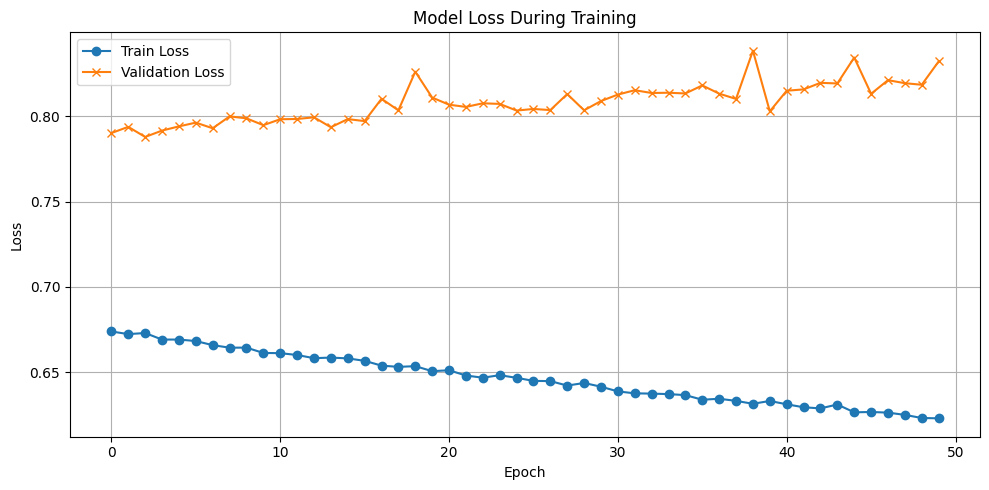

In [19]:
import matplotlib.pyplot as plt


# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

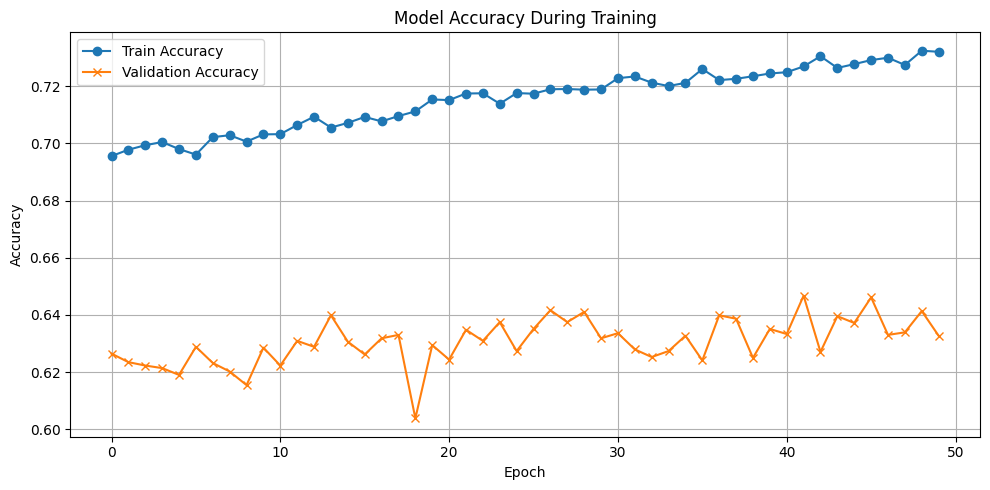

In [20]:
# Optional: Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Regression

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [22]:
df = pd.read_csv("/content/drive/MyDrive/NN/Lab 3/wine_data.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [23]:
X = df.drop('quality', axis=1)
y = df['quality']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
#Build ANN model for regression
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 neuron, no activation
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [29]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11.4950 - mae: 2.6695 - val_loss: 4.5855 - val_mae: 1.7801
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4250 - mae: 1.7402 - val_loss: 4.2885 - val_mae: 1.7426
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2234 - mae: 1.7178 - val_loss: 4.1645 - val_mae: 1.7342
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0575 - mae: 1.6969 - val_loss: 4.1153 - val_mae: 1.7139
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9408 - mae: 1.6751 - val_loss: 4.0583 - val_mae: 1.7181
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9619 - mae: 1.6873 - val_loss: 4.0690 - val_mae: 1.6898
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9815 - mae: 1.6890 - val_loss: 4.0199 - val_mae: 1.6965
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9599 - mae: 1.6886 - val_loss: 4.0255 - val_mae: 1.6939
Epoch 9/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - l

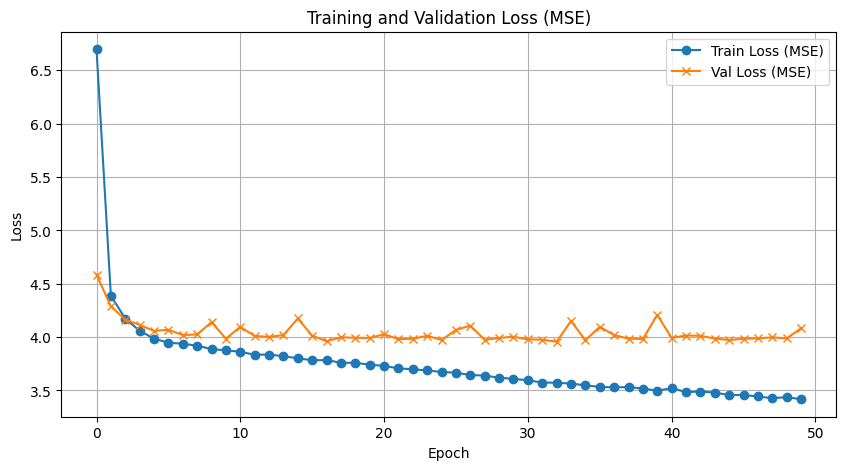

In [34]:
#Plot loss (MSE)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)', marker='x')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#Evaluate model on test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0516 - mae: 1.6173
Test MAE: 1.5951


In [36]:
#Predict and compute RMSE
y_pred = model.predict(X_test).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test RMSE: 1.9828


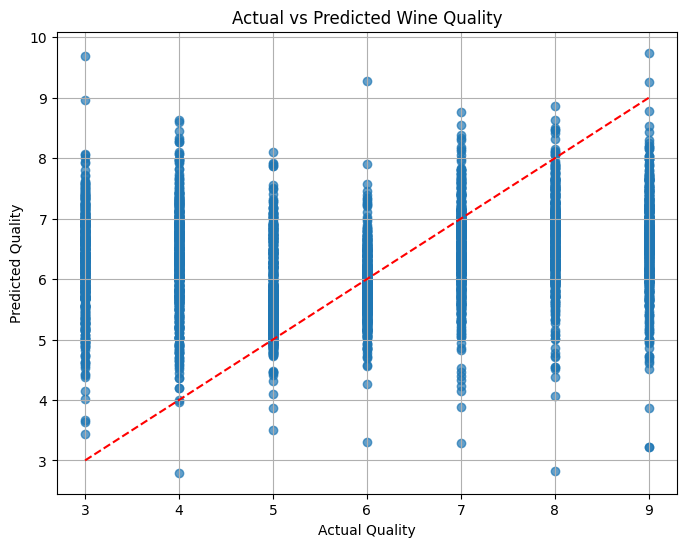

In [37]:
#Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()